# Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Reading Data

In [3]:
df = pd.read_csv('C:\\Users\\91630\\Desktop\\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Preprocessing

In [8]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [9]:
df.duplicated().sum()

415

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


C:\Users\91630\AppData\Local\Temp\ipykernel_2732\1673914350.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Ham', 'Spam'])


Text(0.5, 0, 'Category')

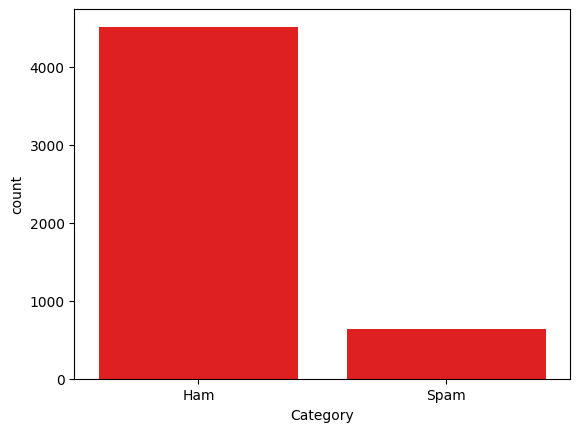

In [85]:
ax = sns.countplot(x = df['Category'], color = 'red')
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('Category')

In [13]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4516   4516  Go until jurong point, crazy.. Available only ...   
spam         641    641  Free entry in 2 a wkly comp to win FA Cup fina...   

               
         freq  
Category       
ham         1  
spam        1

In [14]:
from sklearn.preprocessing import LabelEncoder
ll = LabelEncoder()

In [15]:
df['Category'] = ll.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

0

In [17]:
df['Category'].value_counts(normalize = True)*100

Category
0    87.570293
1    12.429707
Name: proportion, dtype: float64

# Separating Data into feature and target variables

In [18]:
X = df['Message']
y = df.iloc[:, 0]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

# Splitting Data into Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 10)

In [59]:
X_train.shape, X_test.shape

((4125,), (1032,))

# Converting Text Data into numerical

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
feature_extraction = CountVectorizer()
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [62]:
X_train_features.shape, X_test_features.shape, y_train.shape, y_test.shape

((4125, 7740), (1032, 7740), (4125,), (1032,))

# Balancing the Data using Smote

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_features, y_train)

In [64]:
y_train.value_counts(normalize = True)*100

Category
1    50.0
0    50.0
Name: proportion, dtype: float64

C:\Users\91630\AppData\Local\Temp\ipykernel_2732\888635613.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Ham', 'Spam'])


Text(0, 0.5, 'Count')

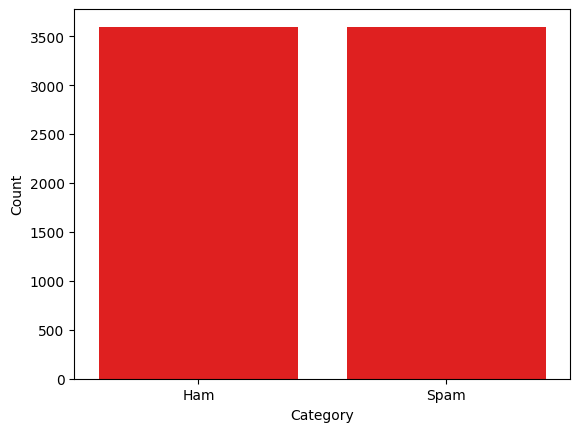

In [65]:
ax = sns.countplot(x = y_train, color = 'red')
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('Category')
plt.ylabel('Count')

# Creating a Naive Bayes Model 

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
model = MultinomialNB(alpha = 0.1)

In [91]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7194, 7740), (1032,), (7194,), (1032,))

# HyperParameter Tuning using GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'alpha' : [0.1, 0.5, 1.0, 1.5, 2.0]}

In [95]:
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs =-1)

In [96]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=0.1), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [97]:
grid.best_score_

0.9088048898120219

In [98]:
grid.best_params_

{'alpha': 0.1}

# Making Predictions 

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
X_pred = model.predict(X_train)
score = accuracy_score(y_train, X_pred)
score

0.8683625243258271

In [101]:
Y_pred = feature_extraction.transform(X_test)
predictions = model.predict(Y_pred)
score = accuracy_score(y_test, predictions)
score

0.9874031007751938

In [102]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       919
           1       0.95      0.94      0.94       113

    accuracy                           0.99      1032
   macro avg       0.97      0.97      0.97      1032
weighted avg       0.99      0.99      0.99      1032



In [103]:
from sklearn.metrics import confusion_matrix

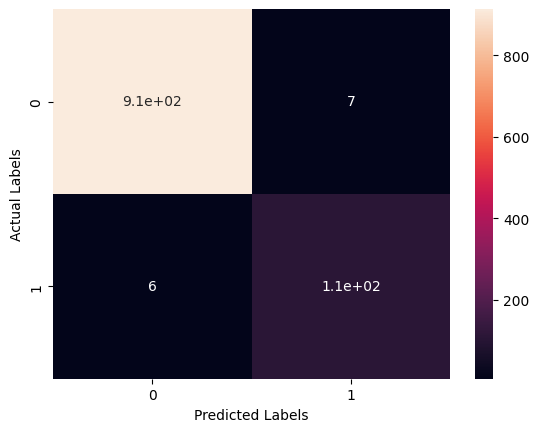

In [104]:
sns.heatmap(confusion_matrix(predictions, y_test), annot =True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [88]:
input_data = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
]
email_spam = feature_extraction.transform(input_data)
predictions = model.predict(email_spam)

In [89]:
if predictions == 1:
    print('The Mail is Spam')
else:
    print('The Mail is not Spam')

The Mail is Spam
